# Import các thư viện cần thiết

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
import re

sns.set()
warnings.filterwarnings('ignore')

# A. THU THẬP DỮ LIỆU

# B. KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU

## Đọc dữ liệu từ file .csv

<!-- Sau khi crawl nhóm đã đẩy data lên GitHub Gist để tiện cho việc download trên Google Colab. -->

In [2]:
# !wget https://gist.githubusercontent.com/hungngocphat01/755385c926399b930d7f35acd7c35056/raw/b36139ab0110fb2ed834a44c756a851509efc6cf/Covid_Data_2022_04_20_Lastest.csv
# !wget https://gist.githubusercontent.com/hungngocphat01/f0383ebf2608f224a120d46c6e82e0d1/raw/226b2bdbadf28963f71bc9c02046244e99050451/Covid_Data_2022_04_21.csv

In [3]:
covid_df = pd.read_csv('Covid_Data_2022_04_21.csv',sep=',')

In [4]:
covid_df.head(10)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalCases/1M pop,...,TotalTests,Test/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"507,654,954","+810,560","6,235,976","+3,289","459,911,989","+944,409","41,506,989","41,828","65,127",...,NaN,NaN,NaN,All,\n,NaN,NaN,NaN,NaN,NaN
1,China,"193,953","+2,841","4,663",+8,"157,869","+2,185","31,421",223,135,...,"160,000,000","111,163","1,439,323,776",Asia,"7,421","308,669",9.0,2,0.01,22
2,USA,"82,553,058","+45,204","1,017,609",+299,"80,355,389","+34,592","1,180,060","1,492","246,798",...,"999,047,824","2,986,727","334,495,877",North America,4,329,0.0,135,0.90,"3,528"
3,India,"43,050,877",+903,"522,095",+33,"42,514,479",NaN,"14,303",698,"30,654",...,"833,377,052","593,395","1,404,421,106",Asia,33,"2,690",2.0,0.6,0.02,10
4,Brazil,"30,330,629","+18,660","662,556",+86,"29,353,398","+12,596","314,675","8,318","140,890",...,"63,776,166","296,249","215,278,697",South America,7,325,3.0,87,0.40,"1,462"
5,France,"28,076,017","+104,007","144,799",+185,"25,618,858","+148,402","2,312,360","1,677","428,423",...,"266,484,045","4,066,382","65,533,452",Europe,2,453,0.0,"1,587",3.00,"35,285"
6,Germany,"23,915,437","+139,849","134,284",+390,"20,853,100","+243,700","2,928,053","1,980","283,809",...,"122,332,384","1,451,739","84,266,089",Europe,4,628,1.0,"1,660",5.00,"34,748"
7,UK,"21,909,509","+19,472","173,032",+646,"20,653,583","+71,883","1,082,894",349,"319,717",...,"514,563,763","7,508,832","68,527,802",Europe,3,396,0.0,284,9.00,"15,802"
8,Russia,"18,110,861","+8,875","374,368",+197,"17,437,610","+14,182","298,883","2,300","124,007",...,"273,400,000","1,871,999","146,047,077",Europe,8,390,1.0,61,1.00,"2,046"
9,S. Korea,"16,674,045","+90,825","21,667",+147,NaN,NaN,NaN,846,"324,723",...,"15,804,065","307,780","51,348,592",Asia,3,"2,370",3.0,"1,769",3.00,"305,419"


Dòng có "Country,Other":"World" là số liệu của thế giới, ta bỏ đi vì là outliers

In [5]:
covid_df = covid_df.drop(index = 0)
covid_df.index = covid_df.index-1

## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [6]:
n_rows, n_cols = covid_df.shape
print(n_rows, n_cols)

228 21


Dữ liệu về Covid có 228 dòng và 21 cột


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa các thông tin về một quốc gia, có vẻ như không có vấn đề, các dòng có cùng ý nghĩa với nhau.

## Dữ liệu có các dòng bị lặp không?

In [7]:
covid_df.duplicated().sum()

0

Vậy các dòng trong tập dữ liệu không bị trùng nhau

## Mỗi cột có ý nghĩa gì?

- **Country,Other**: Quốc gia
- **TotalCases**: Tổng số ca nhiễm
- **NewCases**: Số ca nhiễm mới
- **TotalDeaths**: Tổng số ca tử vong
- **NewDeaths**: Số ca tử vong mới
- **TotalRecovered**: Tổng số ca khỏi bệnh
- **NewRecovered**: Số ca khỏi bệnh mới
- **ActiveCases**: Số ca đang điều trị
- **Serious,Critical**: Số ca nguy kịch
- **TotalCases/1M pop**: Tổng số ca nhiễm trên 1 triệu dân
- **Deaths/1M pop**: Tổng số ca tử vong trên 1 triệu dân
-	**TotalTests**: Tổng số lần xét nghiệm Covid
-	**Test/1M pop**: Tổng số lần xét nghiệm trên 1 triệu dân
-	**Population**: Dân số
- **Continent**: Châu lục
- **1 Caseevery X ppl**: X người sẽ có 1 ca nhiễm
- **1 Deathevery X ppl**: X người sẽ có 1 ca tử vong
- **1 Testevery X ppl**:X người sẽ có 1 người đã được xét nghiệm
- **New Cases/1M pop**: Số ca nhiễm mới trên 1 triệu dân
- **New Deaths/1M pop**: Số ca tử vong mới trên 1 triệu dân
- **Active Cases/1M pop**: Số ca đang điều trị trên 1 triệu dân

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country,Other        228 non-null    object 
 1   TotalCases           228 non-null    object 
 2   NewCases             131 non-null    object 
 3   TotalDeaths          228 non-null    object 
 4   NewDeaths            69 non-null     object 
 5   TotalRecovered       213 non-null    object 
 6   NewRecovered         111 non-null    object 
 7   ActiveCases          213 non-null    object 
 8   Serious,Critical     151 non-null    object 
 9   TotalCases/1M pop    226 non-null    object 
 10  Deaths/1M pop        217 non-null    object 
 11  TotalTests           212 non-null    object 
 12  Test/1M pop          212 non-null    object 
 13  Population           228 non-null    object 
 14  Continent            226 non-null    object 
 15  1 Caseevery X ppl    226 non-null    obj

## Đưa tất cả các số liệu về dạng numerical

Ta thấy bên trong dữ liệu có rất nhiều con số nhưng lại có dấu phân cách phần nghìn. Một số cột có cả dấu cộng. Tiếp theo ta sẽ tiến hành tiền xử lý để đưa tất cả các chuỗi này về dạng numerical

In [9]:
def processNumeric(value):
  if pd.isnull(value):
    return np.nan
  elif isinstance(value, str):
    # Remove comma
    new_value = re.sub(',', '', value).strip()
    # If empty string: return null
    if len(new_value) == 0:
      return np.nan
    return float(new_value)

In [10]:
def conv_numerical(df):
  cols = df.columns
  categorical_cols = ['Country,Other', 'Continent']

  for col in cols:
    if col not in categorical_cols and df.dtypes[col] == 'object':
      df[col] = df[col].apply(processNumeric).astype('float64')

conv_numerical(covid_df)

In [11]:
covid_df.dtypes

Country,Other           object
TotalCases             float64
NewCases               float64
TotalDeaths            float64
NewDeaths              float64
TotalRecovered         float64
NewRecovered           float64
ActiveCases            float64
Serious,Critical       float64
TotalCases/1M pop      float64
Deaths/1M pop          float64
TotalTests             float64
Test/1M pop            float64
Population             float64
Continent               object
1 Caseevery X ppl      float64
1 Deathevery X ppl     float64
1 Testevery X ppl      float64
New Cases/1M pop       float64
New Deaths/1M pop      float64
Active Cases/1M pop    float64
dtype: object

In [12]:
covid_df.head(10)


,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalCases/1M pop,...,TotalTests,Test/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,China,193953.0,2841.0,4663.0,8.0,157869.0,2185.0,31421.0,223.0,135.0,...,160000000.0,111163.0,1.439324e+09,Asia,7421.0,308669.0,9.0,2.0,0.01,22.0
1,USA,82553058.0,45204.0,1017609.0,299.0,80355389.0,34592.0,1180060.0,1492.0,246798.0,...,999047824.0,2986727.0,3.344959e+08,North America,4.0,329.0,0.0,135.0,0.90,3528.0
2,India,43050877.0,903.0,522095.0,33.0,42514479.0,NaN,14303.0,698.0,30654.0,...,833377052.0,593395.0,1.404421e+09,Asia,33.0,2690.0,2.0,0.6,0.02,10.0
3,Brazil,30330629.0,18660.0,662556.0,86.0,29353398.0,12596.0,314675.0,8318.0,140890.0,...,63776166.0,296249.0,2.152787e+08,South America,7.0,325.0,3.0,87.0,0.40,1462.0
4,France,28076017.0,104007.0,144799.0,185.0,25618858.0,148402.0,2312360.0,1677.0,428423.0,...,266484045.0,4066382.0,6.553345e+07,Europe,2.0,453.0,0.0,1587.0,3.00,35285.0
5,Germany,23915437.0,139849.0,134284.0,390.0,20853100.0,243700.0,2928053.0,1980.0,283809.0,...,122332384.0,1451739.0,8.426609e+07,Europe,4.0,628.0,1.0,1660.0,5.00,34748.0
6,UK,21909509.0,19472.0,173032.0,646.0,20653583.0,71883.0,1082894.0,349.0,319717.0,...,514563763.0,7508832.0,6.852780e+07,Europe,3.0,396.0,0.0,284.0,9.00,15802.0
7,Russia,18110861.0,8875.0,374368.0,197.0,17437610.0,14182.0,298883.0,2300.0,124007.0,...,273400000.0,1871999.0,1.460471e+08,Europe,8.0,390.0,1.0,61.0,1.00,2046.0
8,S. Korea,16674045.0,90825.0,21667.0,147.0,NaN,NaN,NaN,846.0,324723.0,...,15804065.0,307780.0,5.134859e+07,Asia,3.0,2370.0,3.0,1769.0,3.00,305419.0
9,Italy,15934437.0,75020.0,162264.0,166.0,14549360.0,59916.0,1222813.0,415.0,264245.0,...,210506904.0,3490887.0,6.030183e+07,Europe,4.0,372.0,0.0,1244.0,3.00,20278.0


## Phân bố dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

In [13]:
def missing_ratio(s):
    return s.isna().mean() * 100
df = covid_df.loc[:,covid_df.dtypes == np.float64]
missing_df = df.agg([
    missing_ratio, 
])
nume_col_df = pd.concat([missing_df, df.describe()])
nume_col_df.round(1)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalCases/1M pop,Deaths/1M pop,TotalTests,Test/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
missing_ratio,0.0,42.5,3.9,69.7,6.6,51.3,6.6,33.8,0.9,4.8,7.0,7.0,9.000000e-01,0.9,4.8,7.0,42.5,69.7,3.9
count,228.0,131.0,219.0,69.0,213.0,111.0,213.0,151.0,226.0,217.0,212.0,212.0,2.260000e+02,226.0,217.0,212.0,131.0,69.0,219.0
mean,2226556.8,6187.5,28474.8,47.7,2106254.6,8508.2,91877.8,277.0,141961.9,1150.3,29456351.0,1904397.9,3.493437e+07,1039.9,13765.0,12.1,510.2,2.1,24872.5
std,7383916.7,19882.3,98819.9,102.2,7289109.2,29567.5,316612.9,874.1,150973.9,1206.5,106512884.7,3263539.8,1.389877e+08,8837.8,53940.2,29.1,1245.8,3.5,74295.2
min,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,9.0,2.0,5117.0,5099.0,8.050000e+02,1.0,159.0,0.0,0.0,0.0,-1064.3
25%,22581.5,28.5,222.5,1.0,13872.0,22.0,212.0,5.0,11257.0,172.0,347296.8,164740.8,5.599682e+05,4.0,542.0,0.0,2.5,0.2,117.0
50%,163079.0,181.0,2201.0,10.0,131100.0,245.0,2650.0,20.0,88841.0,765.0,2120364.5,772995.5,5.795650e+06,11.0,1308.0,1.0,56.0,0.7,1092.0
75%,1063337.5,1355.5,13932.0,41.0,959289.0,2155.5,30915.0,179.0,233495.5,1844.0,12237504.0,2212139.0,2.184432e+07,89.0,5799.0,6.0,402.0,2.0,11219.0
max,82553058.0,139849.0,1017609.0,646.0,80355389.0,243700.0,2928053.0,8318.0,704474.0,6293.0,999047824.0,21807666.0,1.439324e+09,117193.0,623755.0,196.0,9159.0,22.0,547533.0


Ta thấy các cột `NewCases`, `NewDeaths` và `NewRecovered` có tỉ lệ missing rất cao. Liệu ta có thể fill các cột này bằng mean hay không?

In [14]:
covid_df.NewCases.mean()

6187.480916030534

Text(0.5, 1.0, 'Distribution of null records, with respect to TotalCases')

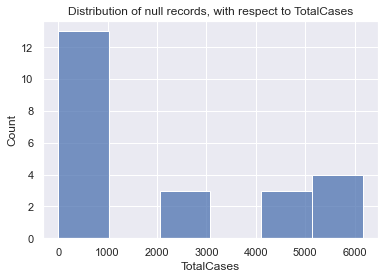

In [15]:
null_idx = covid_df.NewCases.isnull() | covid_df.NewDeaths.isnull() | covid_df.NewRecovered.isnull()

# Take a closer look into the lower part of the distribution
q = covid_df.TotalCases.quantile(0.1)
sns.histplot(data=covid_df[null_idx & (covid_df.TotalCases < q)], x='TotalCases')

plt.title('Distribution of null records, with respect to TotalCases')

Nếu ta fill các cột này bằng phương pháp mean sẽ không ổn vì mean của `NewCases` là rất lớn, trong khi các quốc gia bị missing có thể chỉ có dưới 6000 ca `TotalCases`, điều này là không hợp lý. 

Nhóm em sẽ thử sử dụng data của ngày hôm trước (20/4) để fill cho ngày hiện tại là 21/04.

In [16]:
df21 = covid_df.copy()
df20 = pd.read_csv('Covid_Data_2022_04_20_Lastest.csv')
df20 = df20.drop(index=0)
conv_numerical(df20)

In [17]:
# Guarantee consistency between 2 dataframes
df20 = df20.set_index('Country,Other').drop('Continent', axis=1)
df21 = df21.set_index('Country,Other')
continent = df21.Continent
df21 = df21.drop('Continent', axis=1)

In [18]:
null_mask21 = df21.isnull()
null_mask20 = df20.isnull()

# Set null indices of df21 to zero
df21[null_mask21] = 0.0

# Set non-null indices of df21 in df20 to zero
df20[~null_mask21] = 0.0

# Sum 2 dataframes
# Null indices in df21 are now filled using corresponding data from df20
df = df21 + df20

# Restore positions where both null in df20 and df21
df[null_mask21 & null_mask20] = np.nan

df['Continent'] = continent
df = df.reset_index()
df = df.rename({'index': 'Country,Other'})
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalCases/1M pop,...,TotalTests,Test/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Continent
0,Afghanistan,178611.0,56.0,7680.0,1.0,161683.0,18.0,9248.0,1124.0,4410.0,...,938557.0,23171.0,40505408.0,227.0,5274.0,43.0,1.0,0.02,228.0,Asia
1,Albania,274606.0,71.0,3496.0,NaN,270789.0,47.0,321.0,2.0,95610.0,...,1795792.0,625245.0,2872142.0,10.0,822.0,2.0,25.0,NaN,112.0,Europe
2,Algeria,265754.0,8.0,6874.0,NaN,178341.0,4.0,80539.0,6.0,5870.0,...,230861.0,5099.0,45275692.0,170.0,6587.0,196.0,0.2,NaN,1779.0,Africa
3,Andorra,41013.0,304.0,153.0,NaN,40343.0,344.0,517.0,14.0,529289.0,...,249838.0,3224257.0,77487.0,2.0,506.0,0.0,3923.0,NaN,6672.0,Europe
4,Angola,99194.0,NaN,1900.0,NaN,97149.0,NaN,145.0,NaN,2858.0,...,1499795.0,43216.0,34704728.0,350.0,18266.0,23.0,NaN,NaN,4.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Wallis and Futuna,454.0,NaN,7.0,NaN,438.0,NaN,9.0,NaN,41709.0,...,20508.0,1884061.0,10885.0,24.0,1555.0,1.0,NaN,NaN,827.0,Australia/Oceania
224,Western Sahara,10.0,NaN,1.0,NaN,9.0,NaN,0.0,NaN,16.0,...,NaN,NaN,623755.0,62376.0,623755.0,NaN,NaN,NaN,NaN,Africa
225,Yemen,11818.0,NaN,2148.0,NaN,9001.0,NaN,669.0,23.0,381.0,...,265253.0,8554.0,31007639.0,2624.0,14436.0,117.0,NaN,NaN,22.0,Asia
226,Zambia,318984.0,124.0,3974.0,1.0,314075.0,209.0,935.0,NaN,16519.0,...,3408441.0,176513.0,19309901.0,61.0,4859.0,6.0,6.0,0.05,48.0,Africa


In [19]:
pd.concat({'after': df.agg(missing_ratio).to_frame().T, 'before': missing_df})

,,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalCases/1M pop,...,TotalTests,Test/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Continent
after,0,0.0,0.0,33.333333,3.947368,61.842105,6.578947,44.298246,6.578947,33.77193,0.877193,...,7.017544,7.017544,0.877193,0.877193,4.824561,7.017544,33.333333,61.842105,3.947368,0.877193
before,missing_ratio,NaN,0.0,42.543860,3.947368,69.736842,6.578947,51.315789,6.578947,33.77193,0.877193,...,7.017544,7.017544,0.877193,0.877193,4.824561,7.017544,42.543860,69.736842,3.947368,NaN


Tình hình có cải thiện, nhưng vẫn không quá khả quan.

Ta có thể tiếp tục thu thập thêm dữ liệu từ các nguồn khác, nhưng theo đề bài thì nhóm chúng em là nhóm _trực quan hóa_ nên chuyện này không thuộc thẩm quyền xử lý của nhóm (ít nhất là với lab này).

Tạm thời, ta sẽ bỏ qua các cột này.

Các cột `1 Caseevery X ppl`,	`1 Deathevery X ppl`,	`1 Testevery X ppl` được tính từ các cột `TotalCases`,	`TotalDeaths`,	`TotalRecovered`, `Population` nên ta cũng sẽ bỏ qua các cột này

In [20]:
df = covid_df.drop(['NewCases', 
                    'NewDeaths',
                    'NewRecovered',
                    'Serious,Critical',
                    'New Cases/1M pop',
                    'New Deaths/1M pop', 
                    '1 Caseevery X ppl', 
                    '1 Deathevery X ppl', 
                    '1 Testevery X ppl'], axis = 1)
df = df.dropna().reset_index().drop('index', axis=1)

# C. Phân tích và trực quan hóa
## Xem xét phân phối của một số cột kiểu numerical

Text(0.5, 0.98, 'Plots are drawn in log-scale')

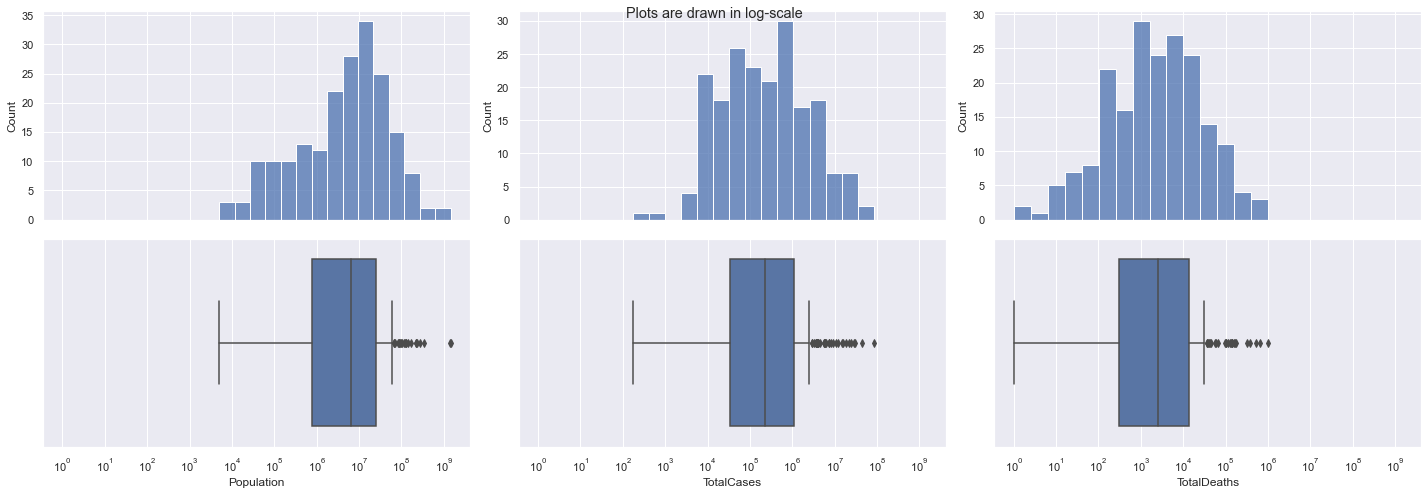

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 7), sharex=True)

for ax in axes.ravel():
  ax.set_xscale('log')
  ax.set_xticks([pow(10, x) for x in range(0, 10)])

b = 15
sns.histplot(data=df, x='Population', ax=axes[0, 0], bins=b)
sns.histplot(data=df, x='TotalCases', ax=axes[0, 1], bins=b)
sns.histplot(data=df, x='TotalDeaths', ax=axes[0, 2], bins=b)
sns.boxplot(data=df, x='Population', ax=axes[1, 0])
sns.boxplot(data=df, x='TotalCases', ax=axes[1, 1])
sns.boxplot(data=df, x='TotalDeaths', ax=axes[1, 2])


plt.tight_layout()
plt.suptitle('Plots are drawn in log-scale')

- Về dân số: dân số của các nước trên thế giới phân bố không đều: 50% các nước có dân số từ khoảng 5000 đến dưới 10 triệu người, 50% còn lại có dân số trên 10 triệu người. Có 1 điểm dữ liệu đặc biệt, với giá trị lên đến hơn 1 tỷ.
- 50% các nước có tổng số ca nhiễm nằm từ khoảng 12,000 đến 1 triệu ca (IQR). Có nước cá biệt nhiễm lên đến khoảng 100 triệu ca. Phân phối bị lệch về bên trái.
- 50% các nước có tổng số ca tử vong nằm trong khoảng 200 đến 11,000 ca (IQR). Có nước cá biệt chết đến trên 1 triệu người. Phân phối bị lệch trái.


Text(0.5, 0.98, 'Plots are drawn in log-scale')

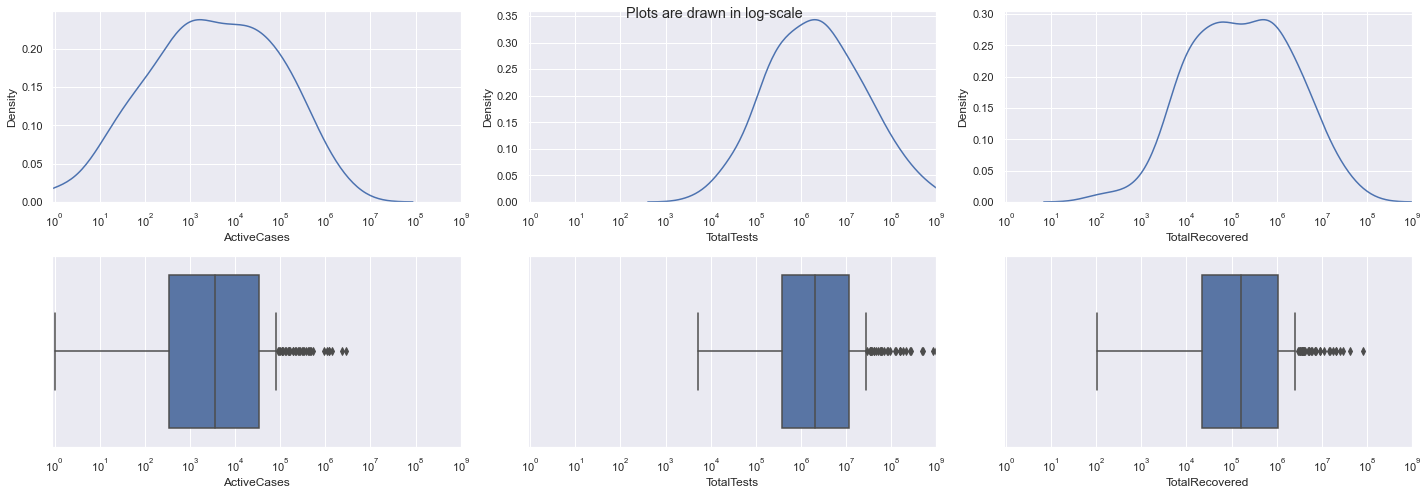

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 7))

for ax in axes.ravel():
  ax.set_xscale('log')
  ax.set_xticks([pow(10, x) for x in range(0, 10)])
  ax.set_xlim([0, 1e9])

b = 10
sns.kdeplot(data=df, x='ActiveCases', ax=axes[0, 0])
sns.kdeplot(data=df, x='TotalTests', ax=axes[0, 1])
sns.kdeplot(data=df, x='TotalRecovered', ax=axes[0, 2])

sns.boxplot(data=df, x='ActiveCases', ax=axes[1, 0])
sns.boxplot(data=df, x='TotalTests', ax=axes[1, 1])
sns.boxplot(data=df, x='TotalRecovered', ax=axes[1, 2])


plt.tight_layout()
plt.suptitle('Plots are drawn in log-scale')

- 50% các nước có số ca đang điều trị từ khoảng 200 đến khoảng 15000 ca (IQR). So với tổng số ca đã nhiễm thì con số này không nhiều, cũng dễ hiểu vì dịch đã xuất hiện được hơn 2 năm.
- 50% các nước đã thực hiện test trên khoảng 500k đến trên 10 triệu người.
- 50% các nước có tổng số ca hồi phục nằm trong khoảng 11,000 đến 1 triệu (IQR). Khoảng này gần match với khoảng tổng số ca nhiễm. Một số ít nước có số liệu khá tích cực, đã hồi phục được gần 100 triệu người.

## Tìm hiểu phân bố của các hàng bị null ở `covid_df`
Ở trên, ta đã biết được có một lượng rất lớn các hàng bị null, mỗi hàng ứng với 1 quốc gia. Vậy lý do vì đâu các hàng này bị null? Giả thuyết: các quốc gia nhỏ thống kê không tốt bằng các quốc gia lớn.

In [23]:
null_df = covid_df.copy()
null_df['Null'] = null_idx

Text(0.5, 1.0, 'Distribution of null/non-null rows with respect to Population')

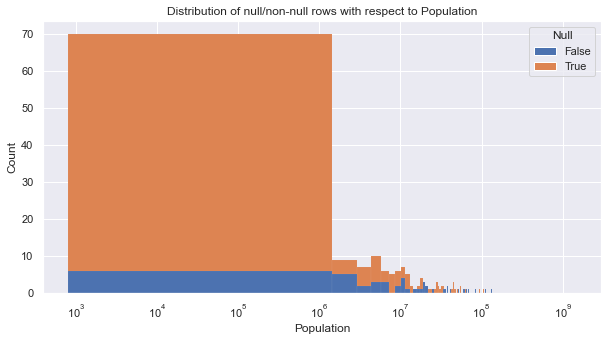

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(data=null_df, x='Population', hue='Null', alpha=1, bins=1000)
plt.gca().set_xscale('log')
plt.title('Distribution of null/non-null rows with respect to Population')

**Kết luận:** vậy các quốc gia nhỏ thì thống kê sẽ không tốt bằng các quốc gia lớn hơn, hay nói cách khác, `Population` có ảnh hưởng đến tỉ lệ null của các cột đã nêu. Ta thấy các quốc gia có dân số từ khoảng 1 triệu trở xuống thống kê không được tốt so với các quốc gia lớn hơn.


<AxesSubplot:title={'center':'Number of null countries, categorized by continents'}, ylabel='Continent'>

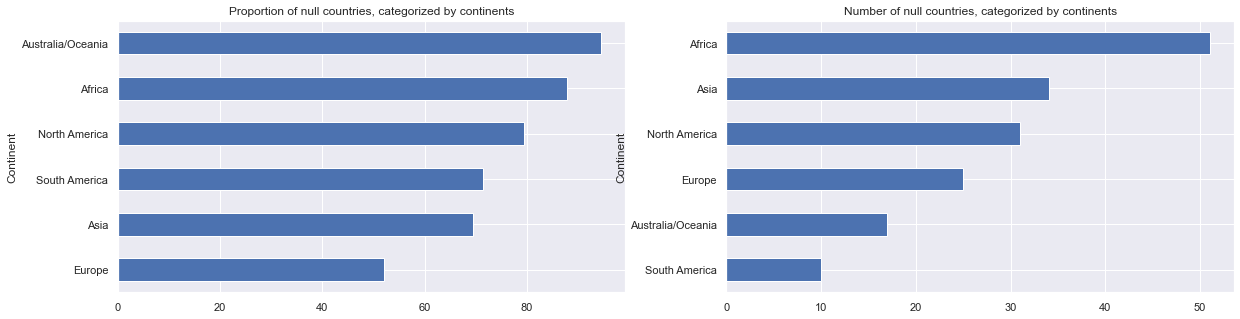

In [25]:
cont_null_df = null_df.groupby('Continent')['Null'].sum()
continent_count_df = null_df.groupby('Continent')['Country,Other'].count()

cont_nullr_df = cont_null_df / continent_count_df * 100
cont_nullr_df.sort_values(inplace=True)
cont_null_df.sort_values(inplace=True)

fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

cont_nullr_df.plot(
    kind='barh', 
    title='Proportion of null countries, categorized by continents',
    ylabel='Null country percentage',
    ax=axes[0]
)

cont_null_df.plot(
    kind='barh', 
    title='Number of null countries, categorized by continents',
    ylabel='Null country percentage',
    ax=axes[1]
)

Tỉ lệ null khác nhau giữa các châu lục, với châu Phi là bị null nhiều nhất, kế đến là châu Úc. Thấp nhất là châu Âu, có lẽ các quốc gia ở châu lục này thống kê tốt hơn các quốc gia còn lại.

## Trực quan hóa các số liệu thống kê
### Tỉ lệ tình trạng bệnh nhân trên toàn cầu

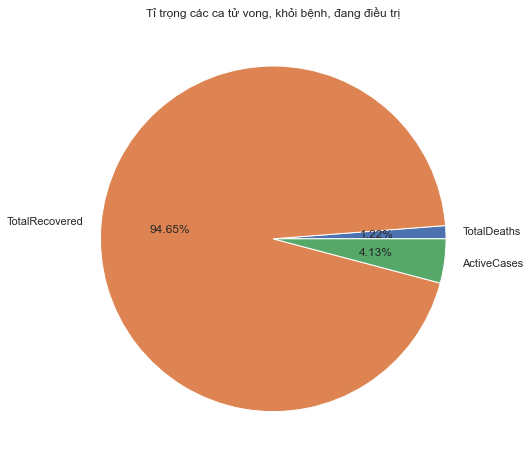

In [26]:
labels = ['TotalDeaths', 'TotalRecovered', 'ActiveCases']
amount = df[['TotalDeaths', 'TotalRecovered', 'ActiveCases']].sum()
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
ax.pie(amount, labels = labels,autopct='%1.2f%%');
ax.set_title("Tỉ trọng các ca tử vong, khỏi bệnh, đang điều trị");

Tổng số ca tử vọng chiếm tỉ trọng rất thấp, chỉ 1.22%. Nguyên nhân là do đã có vaccine covid-19 nên số ca tử vong hàng ngày đã giảm đáng kể.

Tổng số ca khỏi bệnh chiếm tỉ trọng rất cao 94.65%, cho thấy căn bệnh này không còn quá nguy hiểm đối với mọi người

### Số lượng và tỉ trọng quốc gia ở các châu lục

Asia                 45
North America        36
South America        11
Europe               44
Australia/Oceania    11
Africa               50
Name: Continent, dtype: int64

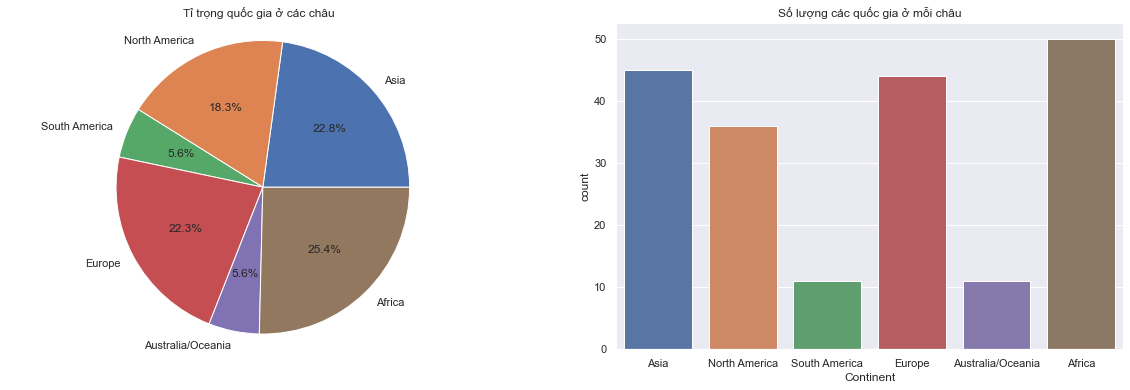

In [27]:
labels = df["Continent"].unique()
sizes = df['Continent'].value_counts()[labels]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
# #plotting pie plot
ax1.pie(sizes,
        labels=labels,
        autopct='%1.1f%%');
ax1.axis('equal')
ax1.set_title("Tỉ trọng quốc gia ở các châu ")
#plotting bar plot
sns.countplot(x="Continent", data=df, ax=ax2).set_title("Số lượng các quốc gia ở mỗi châu")
sizes

Từ biểu đồ ta thấy được dữ liệu thu thập từ hầu hết các quốc gia trên thế giới, nhiều nhất là Châu Phi với 50 quốc gia, tiếp sau đó là Châu Á và Châu Âu với 45 và 44 quốc gia

### Phân bố tình trạng bệnh nhân giữa các châu lục

**Ta tiến hành thống kê dữ liệu về số ca tử vong, khỏi bệnh ,đang điều trị và dân số để thấy rõ hơn căn bệnh covid ở từng châu**

In [28]:
continent_df = df.groupby("Continent")[[
    'TotalDeaths', 
    'TotalRecovered', 
    'ActiveCases', 
    'TotalCases',
    'Population']].sum()
continent_df

,TotalDeaths,TotalRecovered,ActiveCases,TotalCases,Population
Continent,,,,,
Africa,218946.0,9960307.0,482144.0,10661397.0,1.267908e+09
Asia,1386938.0,123784523.0,3393375.0,128564836.0,4.600800e+09
Australia/Oceania,9498.0,6132343.0,491751.0,6633592.0,4.285993e+07
Europe,1672702.0,164393381.0,12083001.0,178149084.0,6.895399e+08
North America,1455286.0,93756458.0,2460887.0,97672631.0,5.906106e+08
South America,1044526.0,50527174.0,643063.0,52214763.0,3.852294e+08


Text(0.5, 1.0, 'Tỉ trọng đang điều trị ở các châu ')

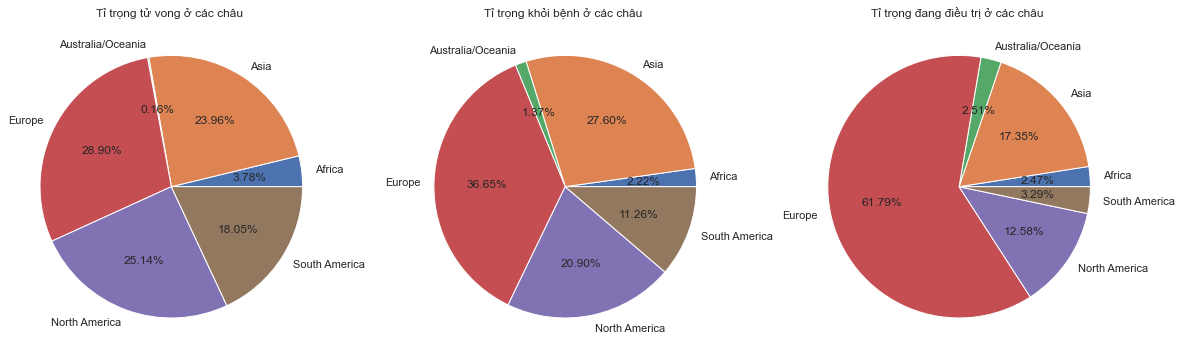

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), sharex=True)


labels = continent_df.index;
ax1.pie(data=continent_df, x='TotalDeaths', labels=labels, autopct='%.2f%%');
ax2.pie(data=continent_df, x='TotalRecovered', labels=labels, autopct='%.2f%%');
ax3.pie(data=continent_df, x='ActiveCases', labels=labels, autopct='%.2f%%');


ax1.set_title("Tỉ trọng tử vong ở các châu ")
ax2.set_title("Tỉ trọng khỏi bệnh ở các châu ")
ax3.set_title("Tỉ trọng đang điều trị ở các châu ")


Ta thấy được châu Âu chiếm tỉ trọng cao nhất ở 3 biểu đồ lần lượt là 28.9%, 36.65%, 61.79%, đặc biệt là số ca đang điều trị ở châu Âu chênh lệch rất nhiều so với các châu lục khác hơn 44.44% so với vị trí thứ 2 là châu Á (17.35%).

Bên cạnh đó, châu Đại Dương chiếm tỉ trọng nhỏ nhất ở tỉ trọng tử vọng và tỉ trọng khỏi bệnh lần lượt là 0.16%, 1.37%.

Châu Phi có tỉ trọng đang điều trị thấp nhất chỉ với 2.47%



**Tiếp theo ta dùng stack barchart để xem mối quan hệ tương quan giữa số ca tử vong, khỏi bệnh và đang điều trị của các châu lục và so sách với dân số của từng châu. Quan sát giữ liệu để thấy ra điều bất thường**

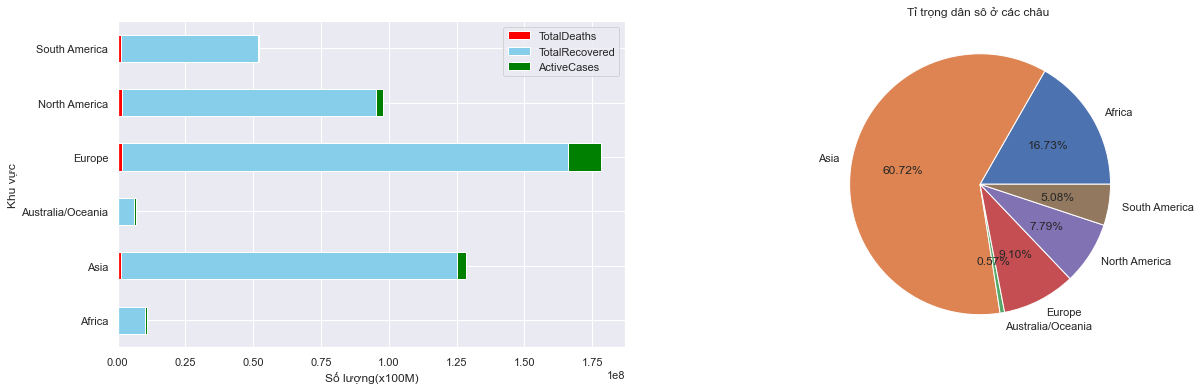

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
#plotting bar plot
case_df = continent_df[['TotalDeaths', 'TotalRecovered', 'ActiveCases']]
case_df.plot(kind='barh', 
                  stacked=True, 
                  color=['red', 'skyblue', 'green'],
                  figsize=(20, 6),
                  ax=ax1)
ax1.set_ylabel("Khu vực")
ax1.set_xlabel("Số lượng(x100M)")
# #plotting pie plot
ax2.pie(data=continent_df, x='Population', labels=labels, autopct='%.2f%%');
ax2.set_title("Tỉ trọng dân sô ở các châu ");

Giống như các phân tích ở trên, châu Âu có số lượng ca nhiễm covid nhiều nhất với hơn 177 triệu ca nhiễm nhưng dân số chỉ chiếm có 9.1% so vơi tổng dân số trong dữ liệu (hơn 689 triệu dân)

Điều bất thường tiếp theo là dân số của châu Phi có tỉ trọng cao thứ 2 với 16.73% (hơn 1,2 tỉ dân) lại có số ca nhiễm khá thấp (khoảng 10,6 triệu ca nhiễm)

Vì dân số các châu lục là khác nhau, ta có thể nhìn thấy điều này rõ hơn thông qua các cột đã được chuẩn hóa:

In [31]:
df['Recovered/1M pop'] = df['TotalRecovered'] / df['Population'] * 1e6

<AxesSubplot:title={'center':'Normalized patient status percentage in various continents'}, ylabel='Continent'>

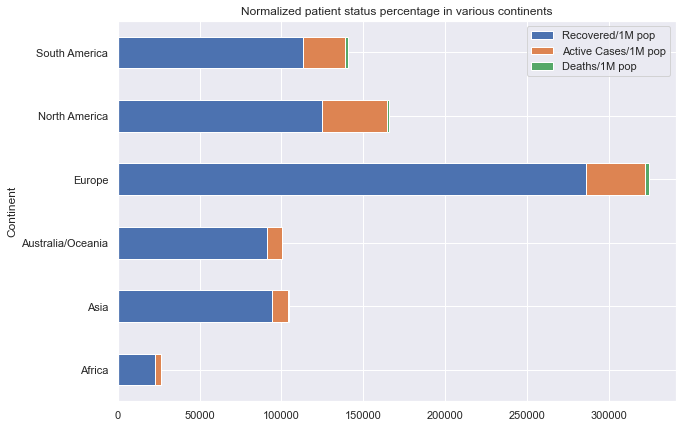

In [32]:
norm_case_df = df.groupby('Continent')[['Recovered/1M pop', 'Active Cases/1M pop', 'Deaths/1M pop']].mean()
norm_case_df.plot(
    kind='barh', 
    stacked=True,
    figsize=(10, 7),
    title='Normalized patient status percentage in various continents'
)

Sau khi chuẩn hóa (bằng cách lấy tỉ lệ theo phần triệu), châu Âu vẫn là châu lục có tỉ lệ nhiễm cao nhất. Châu Phi là châu lục có tỉ lệ nhiễm thấp nhất.

Dữ liệu trên vẫn không đáng tin vì các dòng của các nước ở châu Phi có nhiêu giá trị null nhất. Giả thiết được đưa ra là do không phát hiện ca nhiễm mới hoặc chính phủ ở các nước này không thống kê hết các ca nhiễm.

Sau khi lên mạng tìm hiểu thì nhóm sẽ nghiên về giả thiết thứ 2 hơn. Nhóm xin trích lại 1 đoạn trên bài báo của [VNExpress](https://vnexpress.net/vi-sao-so-ca-covid-19-tu-vong-o-chau-phi-rat-thap-4443332.html)

"*Một dự án nghiên cứu Đại học Njala phát hiện 78% dân số nước này có kháng thể với virus. Tuy nhiên, Sierra Leone chỉ ghi nhận 125 ca tử vong vì Covid-19 kể từ đầu đại dịch.*

*Hầu hết người dân qua đời tại nhà, thay vì bệnh viện. Nhiều ca tử vong không được báo cáo với chính phủ. Tình trạng này phổ biến ở khu vực châu Phi cận Sahara. Cuộc khảo sát gần đây của Ủy ban Kinh tế Liên Hợp Quốc về châu Phi cho thấy các hệ thống chỉ ghi nhận khoảng một phần ba số ca tử vong thực tế.*"

## Khảo sát các mối quan hệ trên các cột numeric

<AxesSubplot:>

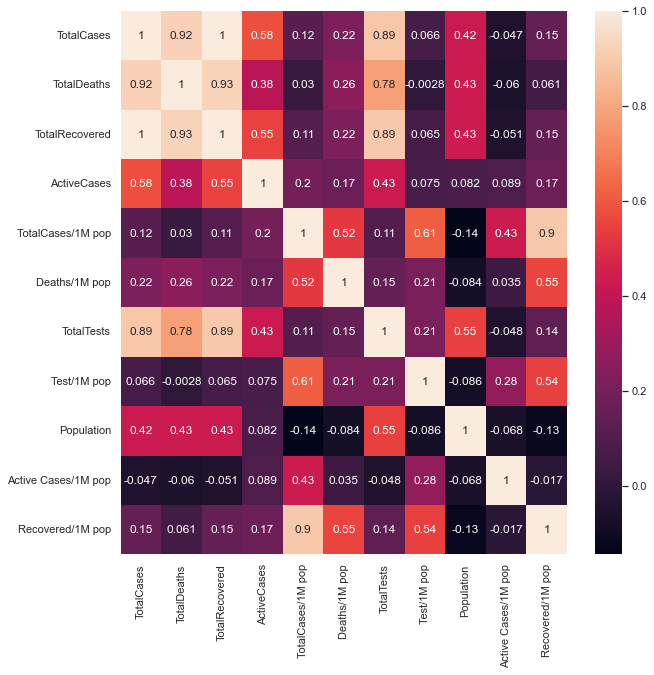

In [33]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

Từ heatmap, có thể thấy các biến sau có tương quan mạnh với nhau:
- TotalCases, TotalDeaths
- TotalCases, TotalRecovered
- TotalCases, TotalTests
- TotalDeaths, TotalRecovered
- TotalDeaths, TotalTests
- TotalRecovered, ActiveCases

Ta cũng thấy được biến dân số (Population) có ảnh hưởng yếu tới các biến TotalCases, TotalDeaths, TotalRecovered.

## Tìm hiểu mối quan hệ giữa các cặp biến với nhau (2 biến)



*   Giữa tổng số ca tử vong và tổng dân số




In [34]:
#Thiết lập mô hình thống kê
m = sm.OLS(df['TotalDeaths'], sm.add_constant(df['Population']))
r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalDeaths   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     43.75
Date:                Thu, 05 May 2022   Prob (F-statistic):           3.50e-10
Time:                        13:24:31   Log-Likelihood:                -2532.8
No. Observations:                 197   AIC:                             5070.
Df Residuals:                     195   BIC:                             5076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.796e+04   6864.551      2.617      0.010    4424.990    3.15e+04
Population     0.0003   4.49e-05      6.615      0.000       0.000       0.000
==============================================================================
Omnibus:                      267.778   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24558.133
Skew:                           5.720   Prob(JB):                         0.00
Kurtosis:                      56.488   Cond. No.                     1.58e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

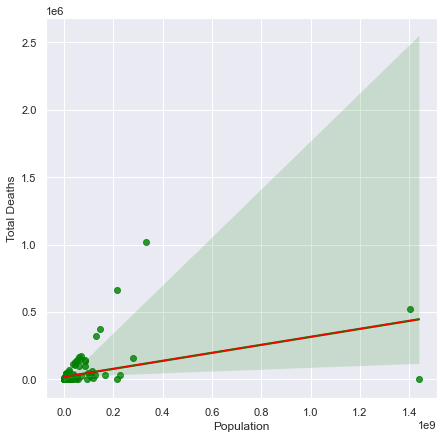

In [35]:
#Vẽ scatter plot thể hiện quan hệ giữa dân số và tổng số ca tử vong
w0, w1 = r.params
t = np.linspace(0, np.max(df['Population']), num=10000)
plt.figure(figsize=(7, 7))
sns.regplot(df.Population, df.TotalDeaths, color="green")
plt.plot(t,w0 + w1*t, "red")
plt.xlabel("Population")
plt.ylabel("Total Deaths")
plt.show()


* Giữa tổng số ca nhiễm và tổng ca tử vong

In [36]:
#Thiết lập mô hình thống kê
m = sm.OLS(df['TotalRecovered'], sm.add_constant(df['TotalTests']))
r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TotalRecovered   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     774.8
Date:                Thu, 05 May 2022   Prob (F-statistic):           7.60e-70
Time:                        13:24:32   Log-Likelihood:                -3241.1
No. Observations:                 197   AIC:                             6486.
Df Residuals:                     195   BIC:                             6493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.891e+05   2.51e+05      1.548      0.123   -1.07e+05    8.85e+05
TotalTests     0.0612      0.002     27.835      0.000       0.057       0.066
==============================================================================
Omnibus:                      139.941   Durbin-Watson:                   2.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5066.454
Skew:                           2.086   Prob(JB):                         0.00
Kurtosis:                      27.491   Cond. No.                     1.19e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

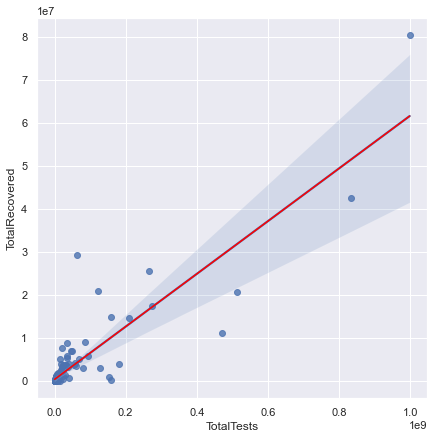

In [37]:
#Vẽ scatter plot thể hiện quan hệ giữa số ca đã test và số ca hồi phục
w0, w1 = r.params
t = np.linspace(0, np.max(df['TotalTests']), num=10000)
plt.figure(figsize=(7, 7))
sns.regplot(df.TotalTests, df.TotalRecovered)
plt.plot(t,w0 + w1*t, "red")
plt.xlabel("TotalTests")
plt.ylabel("TotalRecovered")
plt.show()



*   Giữa số ca nhiễm và số ca tử vong



In [38]:
#Xây dựng mô hình OLS
m = sm.OLS(df['TotalDeaths'], sm.add_constant(df['TotalCases']))
r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalDeaths   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1126.
Date:                Thu, 05 May 2022   Prob (F-statistic):           6.01e-83
Time:                        13:24:32   Log-Likelihood:                -2364.3
No. Observations:                 197   AIC:                             4733.
Df Residuals:                     195   BIC:                             4739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        205.4686   2955.286      0.070      0.945   -5622.959    6033.896
TotalCases     0.0121      0.000     33.557      0.000       0.011       0.013
==============================================================================
Omnibus:                      165.090   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6568.603
Skew:                           2.691   Prob(JB):                         0.00
Kurtosis:                      30.772   Cond. No.                     8.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

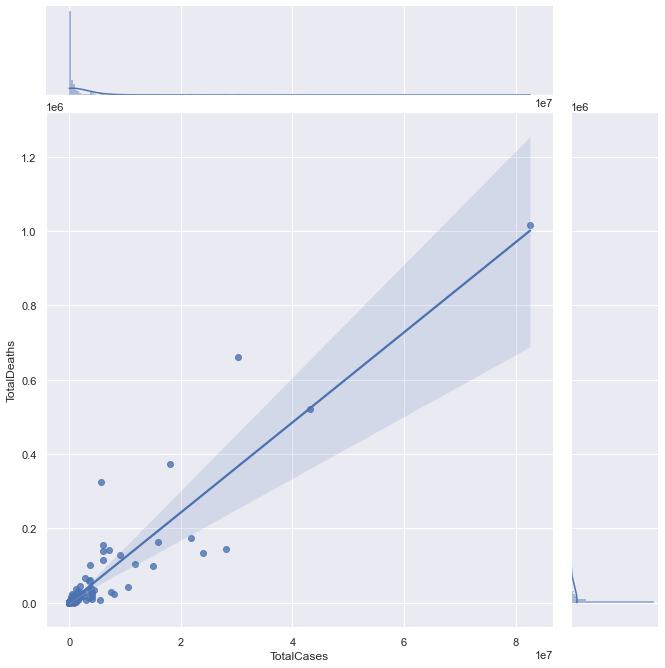

In [39]:
#Vẽ jointplot thể hiện quan hệ giữa tổng số ca nhiễm và tổng số ca tử vong
sns.jointplot(df["TotalCases"], df['TotalDeaths'],kind='reg')
plt.gcf().set_size_inches(10, 10)

- Giữa số ca dương tính và tổng số ca.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ActiveCases   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.05
Date:                Thu, 05 May 2022   Prob (F-statistic):           7.71e-19
Time:                        13:24:33   Log-Likelihood:                -2741.4
No. Observations:                 197   AIC:                             5487.
Df Residuals:                     195   BIC:                             5493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.118e+04      2e+04      2.055      0.041    1651.819    8.07e+04
TotalCases     0.0241      0.002      9.852      0.000       0.019       0.029
==============================================================================
Omnibus:                      228.951   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11404.539
Skew:                           4.570   Prob(JB):                         0.00
Kurtosis:                      39.137   Cond. No.                     8.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

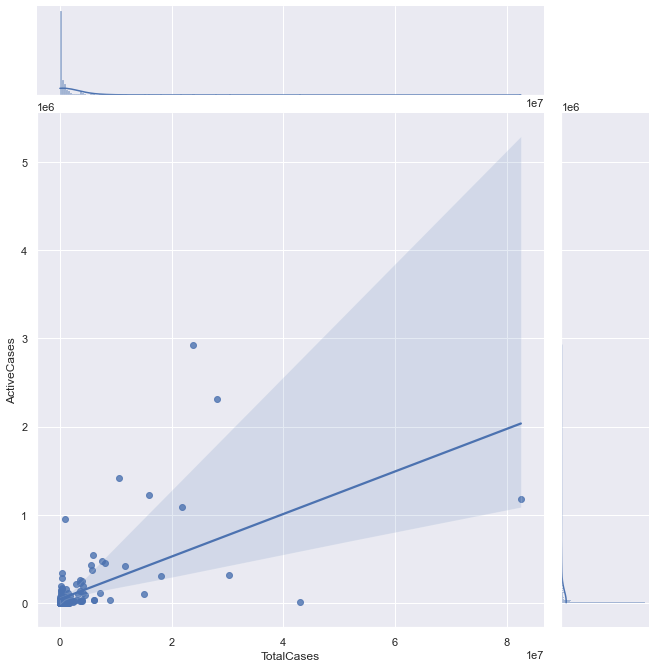

In [40]:
#Xây dựng mô hình OLS
m = sm.OLS(df['ActiveCases'], sm.add_constant(df['TotalCases']))
r = m.fit()
display(r.summary())
sns.jointplot(df["TotalCases"], df['ActiveCases'],kind='reg')
plt.gcf().set_size_inches(10, 10)

## Quan hệ giữa các cột `NewCases`, `NewDeaths`, `NewRecovered`

In [41]:
df2 = covid_df[['NewCases', 'NewDeaths', 'NewRecovered']].dropna().reset_index().drop('index', axis=1)
df2

,NewCases,NewDeaths,NewRecovered
0,2841.0,8.0,2185.0
1,45204.0,299.0,34592.0
2,18660.0,86.0,12596.0
3,104007.0,185.0,148402.0
4,139849.0,390.0,243700.0
5,19472.0,646.0,71883.0
6,8875.0,197.0,14182.0
7,75020.0,166.0,59916.0
8,3354.0,17.0,18964.0
9,12029.0,9.0,8693.0


Số lượng dòng khá ít, chỉ có 59 dòng so với 228 dòng của bộ dữ liệu ban đầu, nên ta sẽ tiến hành xử lí các giá trị null ở 3 cột này

### Xử lí các giá trị `null` ở các cột `NewCases`, `NewDeaths`, `NewRecovered`

**Nguyên nhân dẫn tới các giá trị bị `null`**
- Do không có ca nhiễm/tử vong/ khỏi bệnh tăng
- Do hệ thống chưa cập nhật được dữ liệu từ các quốc gia (các dòng có giá trị `null` ở cột ở các cột `NewCases`, `NewDeaths`, `NewRecovered`)

**Giải pháp**
- Ta có thể lấy dữ liệu các cột `TotalCases`,	`NewCases`,	`TotalDeaths` của ngày 21/4 trừ cho các cột `TotalCases`,	`NewCases`,	`TotalDeaths` của ngày 20/4 sẽ ra được các cột `NewCases`, `NewDeaths`, `NewRecovered` của ngày 21/4

Đọc dữ liệu ngày 20/4 vào `covid_yesterday_df`

In [42]:
covid_yesterday_df = pd.read_csv('Covid_Data_2022_04_20_Lastest.csv',sep=',')
covid_yesterday_df = covid_yesterday_df.drop(index = 0)
covid_yesterday_df.index = covid_yesterday_df.index-1


chuyển các cột về numerical

In [43]:
cols = covid_yesterday_df.columns
categorical_cols = ['Country,Other', 'Continent']

for col in cols:
  if col not in categorical_cols and covid_yesterday_df.dtypes[col] == 'object':
    covid_yesterday_df[col] = covid_yesterday_df[col].apply(processNumeric).astype('float64')

Cập nhật lại các cột `NewCases`, `NewDeaths`, `NewRecovred`

In [44]:
covid_df = covid_df.sort_values(by=['Country,Other'], ignore_index=True)
covid_yesterday_df = covid_yesterday_df.sort_values(by=['Country,Other'], ignore_index=True)
covid_df['NewCases'] = covid_df['TotalCases'] - covid_yesterday_df['TotalCases']
covid_df['NewDeaths'] = covid_df['TotalDeaths'] - covid_yesterday_df['TotalDeaths']
covid_df['NewRecovered'] = covid_df['TotalRecovered'] - covid_yesterday_df['TotalRecovered']

In [45]:
df2 = covid_df.drop(['Serious,Critical',
                    'New Cases/1M pop',
                    'New Deaths/1M pop'], axis = 1)
df2 = df2[['NewCases', 'NewDeaths', 'NewRecovered']].dropna().reset_index().drop('index', axis=1)
df2

,NewCases,NewDeaths,NewRecovered
0,56.0,1.0,18.0
1,0.0,0.0,0.0
2,8.0,0.0,4.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
200,0.0,0.0,0.0
201,0.0,0.0,0.0
202,0.0,0.0,0.0
203,124.0,1.0,209.0


In [46]:
sm.OLS(df2['NewCases'], sm.add_constant(df2['NewRecovered'])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NewCases   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     634.7
Date:                Thu, 05 May 2022   Prob (F-statistic):           2.11e-64
Time:                        13:24:34   Log-Likelihood:                -2115.8
No. Observations:                 205   AIC:                             4236.
Df Residuals:                     203   BIC:                             4242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          787.1792    526.670      1.495      0.137    -251.266    1825.624
NewRecovered     0.5885      0.023     25.193      0.000       0.542       0.635
==============================================================================
Omnibus:                      200.844   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8375.666
Skew:                           3.516   Prob(JB):                         0.00
Kurtosis:                      33.514   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
sm.OLS(df2['NewCases'], sm.add_constant(df2['NewDeaths'])).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NewCases   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     145.6
Date:                Thu, 05 May 2022   Prob (F-statistic):           1.27e-25
Time:                        13:24:34   Log-Likelihood:                -2205.6
No. Observations:                 205   AIC:                             4415.
Df Residuals:                     203   BIC:                             4422.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1156.4540    822.461      1.406      0.161    -465.208    2778.116
NewDeaths    154.5489     12.809     12.065      0.000     129.293     179.805
==============================================================================
Omnibus:                      153.404   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9705.885
Skew:                           2.091   Prob(JB):                         0.00
Kurtosis:                      36.449   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
sm.OLS(df2['NewRecovered'], sm.add_constant(df2['NewDeaths'])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           NewRecovered   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     166.6
Date:                Thu, 05 May 2022   Prob (F-statistic):           3.21e-28
Time:                        13:24:34   Log-Likelihood:                -2279.9
No. Observations:                 205   AIC:                             4564.
Df Residuals:                     203   BIC:                             4570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1008.2956   1181.369      0.853      0.394   -1321.032    3337.624
NewDeaths    237.4724     18.399     12.907      0.000     201.195     273.750
==============================================================================
Omnibus:                      247.347   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17943.726
Skew:                           4.753   Prob(JB):                         0.00
Kurtosis:                      47.837   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

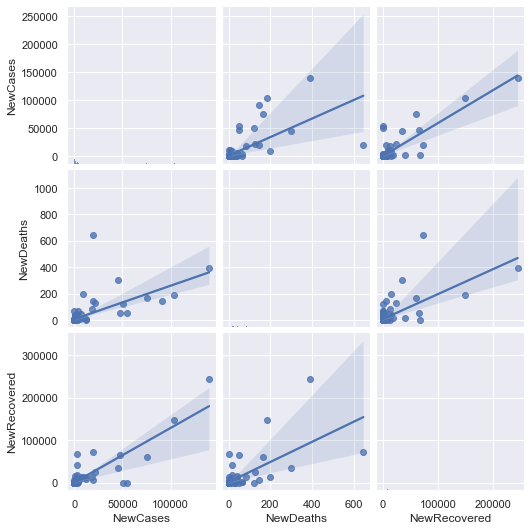

In [49]:
sns.pairplot(covid_df[['NewCases', 'NewDeaths', 'NewRecovered']], kind='reg')

Nhìn vào biểu đồ ta thấy được:
- Các quốc gia có số ca nhiễm ghi nhận hàng ngày càng nhiều thì số ca khỏi bệnh hàng ngày cũng nhiều
- Các quốc gia có số ca nhiễm ghi nhận hàng ngày càng nhiều thì số ca tử vong hàng ngày cũng nhiều
- Các quốc gia có số ca tử vong ghi nhận hàng ngày càng nhiều thì số ca khỏi bệnh hàng ngày cũng nhiều

## Các mối quan hệ trên nhiều hơn 2 biến

Trong phần này, ta sẽ kiểm chứng các mối quan hệ sau:
$$
\mathrm{NewCases} \sim \mathrm{Population} + \mathrm{TotalCases} 
$$

$$
\mathrm{TotalDeaths} \sim \mathrm{TotalCases} + \mathrm{TotalTests}
$$

$$
\mathrm{NewRecovered} \sim \mathrm{Population} + \mathrm{TotalRecovered}
$$

Dữ liệu 3 chiều khi trực quan sẽ khá khó nhìn, do đó ở đây nhóm sẽ sử dụng thống kê phân tích để xem xét các mối quan hệ với nhau.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NewCases   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     46.51
Date:                Thu, 05 May 2022   Prob (F-statistic):           1.31e-17
Time:                        13:24:42   Log-Likelihood:                -2460.2
No. Observations:                 226   AIC:                             4926.
Df Residuals:                     223   BIC:                             4937.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1475.1748    912.090      1.617      0.107    -322.244    3272.593
Population  -1.88e-05    6.9e-06     -2.726      0.007   -3.24e-05   -5.21e-06
TotalCases     0.0012      0.000      9.532      0.000       0.001       0.001
==============================================================================
Omnibus:                      258.911   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11003.268
Skew:                           4.742   Prob(JB):                         0.00
Kurtosis:                      35.841   Cond. No.                     1.51e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Relationship between TotalDeaths, Population and NewDeaths')

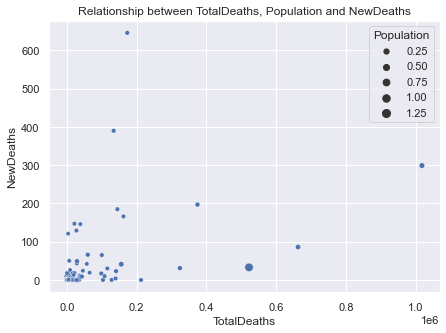

In [50]:
test_df = covid_df[['Population', 'TotalCases', 'NewCases']]
test_df = test_df.dropna()

y = test_df['NewCases']
X = test_df[['Population', 'TotalCases']]
m = sm.OLS(y, sm.add_constant(X))
r = m.fit()
display(r.summary())

plt.subplots(figsize=(7, 5))
sns.scatterplot(data=covid_df, x='TotalDeaths', y='NewDeaths', size='Population')
plt.title('Relationship between TotalDeaths, Population and NewDeaths')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalDeaths   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     496.7
Date:                Thu, 05 May 2022   Prob (F-statistic):           1.56e-79
Time:                        13:24:42   Log-Likelihood:                -2520.2
No. Observations:                 209   AIC:                             5046.
Df Residuals:                     206   BIC:                             5056.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        845.9264   3050.917      0.277      0.782   -5169.100    6860.953
TotalTests    -0.0001   5.74e-05     -2.004      0.046      -0.000   -1.85e-06
TotalCases     0.0134      0.001     16.656      0.000       0.012       0.015
==============================================================================
Omnibus:                      110.100   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3524.974
Skew:                           1.338   Prob(JB):                         0.00
Kurtosis:                      22.940   Cond. No.                     1.17e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Relationship between TotalCases, TotalTests and TotalDeaths')

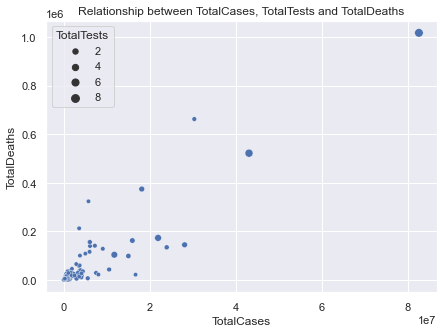

In [51]:
test_df = covid_df[['TotalTests', 'TotalCases', 'TotalDeaths']]
test_df = test_df.dropna()

y = test_df['TotalDeaths']
X = test_df[['TotalTests', 'TotalCases']]
m = sm.OLS(y, sm.add_constant(X))
r = m.fit()
display(r.summary())

plt.subplots(figsize=(7, 5))
sns.scatterplot(data=covid_df, x='TotalCases', y='TotalDeaths', size='TotalTests')
plt.title('Relationship between TotalCases, TotalTests and TotalDeaths')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NewCases   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     577.5
Date:                Thu, 05 May 2022   Prob (F-statistic):           4.39e-86
Time:                        13:24:42   Log-Likelihood:                -2146.1
No. Observations:                 213   AIC:                             4298.
Df Residuals:                     210   BIC:                             4308.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -220.4192    414.528     -0.532      0.595   -1037.588     596.750
NewRecovered     0.2531      0.036      7.095      0.000       0.183       0.323
ActiveCases      0.0268      0.002     10.966      0.000       0.022       0.032
==============================================================================
Omnibus:                      132.463   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4904.383
Skew:                           1.718   Prob(JB):                         0.00
Kurtosis:                      26.255   Cond. No.                     3.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Relationship between NewRecovered, ActiveCases and NewCases')

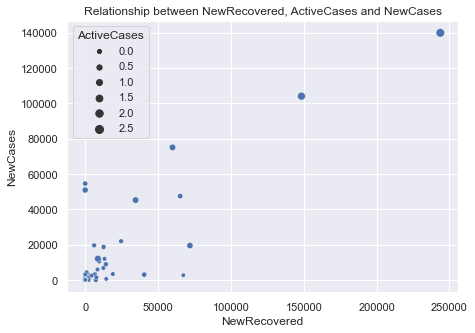

In [52]:
test_df = covid_df[['NewRecovered', 'ActiveCases', 'NewCases']]
test_df = test_df.dropna()

y = test_df['NewCases']
X = test_df[['NewRecovered', 'ActiveCases']]
m = sm.OLS(y, sm.add_constant(X))
r = m.fit()
display(r.summary())

plt.subplots(figsize=(7, 5))
sns.scatterplot(data=covid_df, x='NewRecovered', y='NewCases', size='ActiveCases')
plt.title('Relationship between NewRecovered, ActiveCases and NewCases')

## Các mối quan hệ trên biến categorical

Nhóm sẽ thực hiện sau khi đến các lab được phép sử dụng màu sắc.

In [53]:
# cat_df = covid_df.copy()
# cat_df.set_index('Country,Other', inplace=True)

In [54]:
# dummy_df = pd.get_dummies(cat_df.Continent, drop_first=True)
# dummy_df.columns = [f'DC{i}' for i in range(1, 6)]
# dummy_df

In [55]:
# cat_df.join(dummy_df)

In [56]:
# cat_df = cat_df.join(dummy_df)
# cat_df.reset_index(inplace=True)
# cat_df.rename({'index': 'Country,Other'}, inplace=True)
# cat_df.columns

In [57]:
# cont_df = cat_df[['Continent', 'DC1', 'DC2', 'DC3', 'DC4', 'DC5']].drop_duplicates()
# cont_df.set_index('Continent', inplace=True)
# cont_df = cont_df.drop(np.nan, axis=0)
# cont_df

<!-- Dễ thấy 6 châu lục đã được encode thành 5 cột mới. 

Qua các phân tích ở trên, ta thấy được tỉ trọng tình trạng bệnh nhân ở các châu lục là khác nhau, do đó ta sẽ giả sử rằng: châu lục có ảnh hưởng tương tác đến tổng số ca bệnh. -->

In [58]:
# def dummy_df(xcol, ycol):
#   dummy_df = cat_df.copy()
#   dummy_df = dummy_df[[xcol, ycol, 'Continent'] + [f'DC{i}' for i in range(1, 6)]].dropna()

#   for i in range(1, 6):
#     dummy_df[f'DC{i}*'] = dummy_df[f'DC{i}'] * dummy_df[xcol]
#   return dummy_df

# nc_df = dummy_df('TotalCases', 'NewCases')
# nc_df.columns

In [59]:
# def fit_ols(df, y_col, x_col):
#   x_cols = [x_col]
#   for i in range(1, 6):
#     x_cols.append(f'DC{i}')
#     x_cols.append(f'DC{i}*')

#   X = sm.add_constant(df[x_cols])
#   m = sm.OLS(df[y_col], X)
#   r = m.fit()
#   return r

In [60]:
# r = fit_ols(nc_df, 'NewCases', 'TotalCases')
# r.summary()

In [61]:
# def predict_with_continent(x_col, df, continent):
#     # Create new column for test data (for plotting)
#     test_df = pd.DataFrame({
#         'const': 1,
#         x_col: np.linspace(df[x_col].min(), df[x_col].max())
#     })

#     dc_cols = cont_df.loc[continent]
#     for i in range(1, 6):
#       test_df[f'DC{i}'] = dc_cols[f'DC{i}']
#       test_df[f'DC{i}*'] = test_df[f'DC{i}'] * test_df[x_col]
    
#     return test_df[x_col], r.predict(test_df)

# def plot_reg(r, df, x_col):
#   # For each continent
#   for continent in cont_df.index:
#     x, y_pred = predict_with_continent(x_col, df, continent)

#     # Plot
#     ax = plt.gca()
#     ax.plot(x, y_pred, label=continent)

In [62]:
# plt.subplots(figsize=(10, 7))
# sns.scatterplot(nc_df['TotalCases'], nc_df['NewCases'], hue=nc_df['Continent'])
# plot_reg(r, nc_df, 'TotalCases')
# plt.legend()